In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
user = pd.read_csv('Funnel_data/user_table.csv', parse_dates = ['date'])
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
home = pd.read_csv('Funnel_data/home_page_table.csv')
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
search = pd.read_csv('Funnel_data/search_page_table.csv')
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
payment = pd.read_csv('Funnel_data/payment_page_table.csv')
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
confirm = pd.read_csv('Funnel_data/payment_confirmation_table.csv')
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [8]:
#Table merge
data = pd.merge(left = user, right = home, how = 'left', on ='user_id')
data = pd.merge(left = data, right = search, how = 'left', on = 'user_id', suffixes = ('_home', '_search'))
data = pd.merge(left = data, right = payment, how = 'left', on = 'user_id')
data = pd.merge(left = data, right = confirm, how = 'left', on = 'user_id', suffixes = ('_payment','_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null datetime64[ns]
device               90400 non-null object
sex                  90400 non-null object
page_home            90400 non-null object
page_search          45200 non-null object
page_payment         6030 non-null object
page_confirmation    452 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 4.1+ MB


# Analysis

Probability for Each Page

In [10]:
c_ratio = 1 - pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'conversion'}) / len(data)
c_ratio = c_ratio.reset_index()[4:]
c_ratio

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_payment,0.066704
7,page_confirmation,0.005000


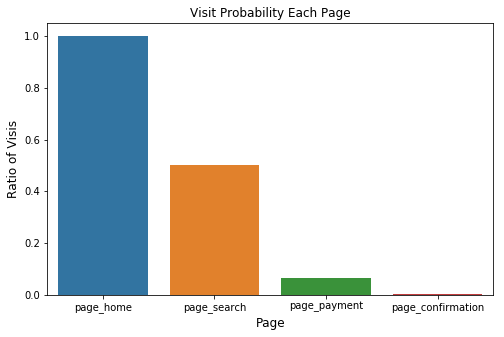

In [11]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = 'index', y = 'conversion', data = c_ratio, ax = ax)
ax.set_xlabel('Page', fontsize = 12)
ax.set_ylabel('Ratio of Visis', fontsize = 12)
ax.set_title('Visit Probability Each Page', fontsize = 12)
plt.show()

In [12]:
#Calculate conversion rate for each page
def conversion_rate(df):
    rates = []
    
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum()/len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1  - tmp['page_payment'].isnull().sum()/len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum()/len(tmp))
    
    return rates

In [13]:
rates = conversion_rate(data)
names = ['home', 'search', 'payment']
maps = {'page': ['home', 'search', 'payment'], 'conversion rate': rates}
overall_conv = pd.DataFrame(data = maps, columns = ['page', 'conversion rate'])

overall_conv

,page,conversion rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


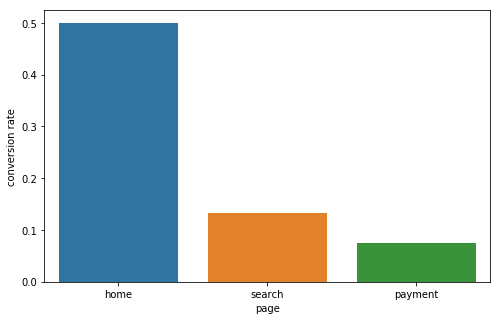

In [14]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = 'page', y = 'conversion rate', data = overall_conv, ax = ax)
plt.show()

## Device

In [15]:
data['device'].unique()

array(['Desktop', 'Mobile'], dtype=object)

In [16]:
desk_conv = conversion_rate(data[data['device'] == 'Desktop'])
mol_conv = conversion_rate(data[data['device'] == 'Mobile'])
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
for name, desk_rate, mol_rate in zip(names, desk_conv, mol_conv):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mol_rate))

   Page    |  Desktop   |   Mobile  
----------------------------------------
home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


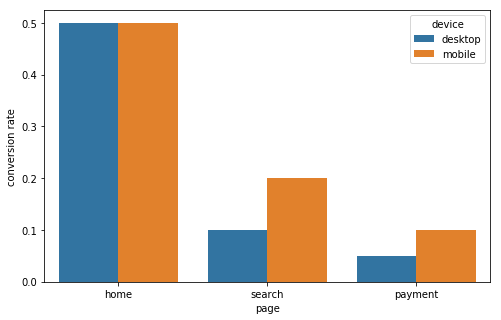

In [17]:
#Visualization
maps = {'page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'device': ['desktop', 'desktop', 'desktop', 'mobile', 'mobile', 'mobile'],
        'conversion rate': desk_conv + mol_conv }
device_conv = pd.DataFrame(maps, columns = ['page', 'device', 'conversion rate'])

fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = 'page', y = 'conversion rate', data = device_conv, ax = ax, hue = 'device')
plt.show()

## Sex

In [18]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
male_conv = conversion_rate(data[data['sex'] == 'Male'])
female_conv = conversion_rate(data[data['sex'] == 'Female'])
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('page', 'male', 'female'))
print('-' * 40)

for name,male_rate, female_rate in zip(names, male_conv, female_conv):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, male_rate, female_rate))

   page    |    male    |   female  
----------------------------------------
home       |   0.496944 |   0.503073
search     |   0.130083 |   0.136708
payment    |   0.072014 |   0.077742


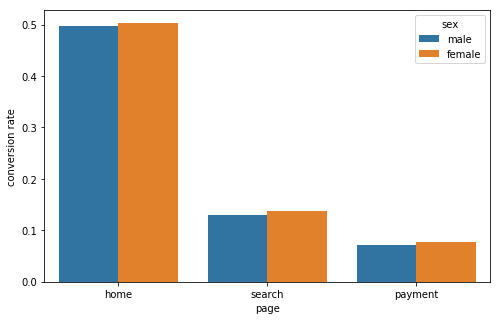

In [20]:
#Visualization
maps = {'page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'sex': ['male', 'male', 'male', 'female', 'female', 'female'],
        'conversion rate': male_conv + female_conv }
sex_conv = pd.DataFrame(maps, columns = ['page', 'sex', 'conversion rate'])

fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = 'page', y = 'conversion rate', data = sex_conv, ax = ax, hue = 'sex')
plt.show()